# Ermias Mikael

## DATA 601 - Project 2 Solution 
##### May 15, 2023

# Source Data
The original dataset and full detail of the description can be found at https://www.kaggle.com/datasets/rajugc/kaggle-dataset

# Notes
1. lecture 7 for data visualizatino
2. data_science_example folder 2_exploratory data analysis template and data_cleaning template and dashboard template

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

from sklearn.metrics import r2_score

import seaborn as sns
import json

# Clears output in functions and Jupyter Notebook Interface and imports Image
from IPython.display import clear_output, Image 

## Default Jupyter Notebook Settings

In [2]:
# PD has a limit of 50 characters.  Removes limit and uses the full text.
pd.set_option('display.max_colwidth', None)

# Sets PD to displays float numbers as 4 decimal places.
pd.options.display.float_format = "{:.4f}".format

# Defining a specific color style to use.  Tableu-Colorblind.
plt.style.use('tableau-colorblind10') 

## Generic Functions

In [3]:
# Function for stripping whitespaces from dataframe columns
def strip_whitespace(x):
    if isinstance(x, str):
        return x.strip()
    else:
        return x

## Data Statistics (20 points)

Explore the data statistics to further identify potential outliers and if the statistics make sense. At minimum you need to use the .describe(), and value_counts() functions. You could also use the groupby functions. Please export the .describe() dataframe and put a copy on the output_data folder. 

In [4]:
# Loading the cleaned dataframe
df_data = pd.read_csv('./output_data/df_data_cleaned.csv',
                      encoding = "utf-8-sig",
                      parse_dates=['Date', 'Day', 'Time'],
                      keep_default_na=False,
                      na_values=['', '-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A','N/A', '#NA', 'NULL', 'NaN', '-NaN', 'nan', '-nan'])


In [5]:
# Verify data loading using the .info() function column name, number of non-nulls, and DType.
df_data.info()

# Not any null, datatypes have been pased appropriates for dates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8956 entries, 0 to 8955
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dataset_name  8955 non-null   object        
 1   Author_name   8956 non-null   object        
 2   Author_id     8956 non-null   object        
 3   No_of_files   8956 non-null   int64         
 4   size          8956 non-null   object        
 5   Type_of_file  8954 non-null   object        
 6   Upvotes       8956 non-null   int64         
 7   Medals        8956 non-null   object        
 8   Usability     8956 non-null   float64       
 9   Date          8956 non-null   datetime64[ns]
 10  Day           8956 non-null   object        
 11  Time          8956 non-null   datetime64[ns]
 12  Dataset_link  8956 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 909.7+ KB


In [6]:
# Use the .head() function to prevew a sample record from the dataframe.
df_data.head(1)

,Dataset_name,Author_name,Author_id,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time,Dataset_link
0,Hotel Reservations Dataset,Ahsan Raza,https://www.kaggle.com/ahsan81,1,491 kB,CSV,315,Silver,10.0000,2023-01-04,Wed,2023-05-15 18:20:31,https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset


In [7]:
# Using describe
# Showing describe for all columns. Also added 'datetime_is_numeric' to suppress warning.

df_data.describe(include='all', datetime_is_numeric=True)

# Observations:
# 1. The difference between unique author names and total count 
#    implies one or more authors have contributed multiple datasets.

,Dataset_name,Author_name,Author_id,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time,Dataset_link
count,8955,8956,8956,8956.0000,8956,8954,8956.0000,8956,8956.0000,8956,8956,8956,8956
unique,8955,4944,4972,NaN,1591,23,NaN,4,NaN,NaN,7,NaN,8956
top,Hotel Reservations Dataset,The Devastator,https://www.kaggle.com/thedevastator,NaN,2 MB,CSV,NaN,Bronze,NaN,NaN,Tue,NaN,https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset
freq,1,501,501,NaN,324,5619,NaN,3700,NaN,NaN,1401,NaN,1
mean,NaN,NaN,NaN,5868.1512,NaN,NaN,67.0258,NaN,7.4568,2021-06-20 05:50:50.111657216,NaN,2023-05-15 13:16:39.296114432,NaN
min,NaN,NaN,NaN,0.0000,NaN,NaN,0.0000,NaN,0.0000,2016-05-09 00:00:00,NaN,2023-05-15 00:00:09,NaN
25%,NaN,NaN,NaN,1.0000,NaN,NaN,7.0000,NaN,5.9000,2020-06-22 18:00:00,NaN,2023-05-15 07:39:22.750000128,NaN
50%,NaN,NaN,NaN,2.0000,NaN,NaN,23.0000,NaN,8.5000,2021-12-20 00:00:00,NaN,2023-05-15 14:19:17.500000,NaN
75%,NaN,NaN,NaN,8.0000,NaN,NaN,50.0000,NaN,9.7000,2022-12-14 00:00:00,NaN,2023-05-15 19:19:46.249999872,NaN
max,NaN,NaN,NaN,3999566.0000,NaN,NaN,7199.0000,NaN,10.0000,2023-02-07 00:00:00,NaN,2023-05-15 23:59:49,NaN


In [8]:
# Using value_counts() again only dateset_name column, because on the others doesn't make sense to run value_counts.
df_data['Dataset_name'].value_counts()

# Observation
# Because of the earlier cleaning done on the dataset counts are unique in the dataset name column


Hotel Reservations Dataset                      1
Smart Cities Index Datasets                     1
23dec_inceptionv4_upsample5e4true6              1
22dec_tfefficientnetv2s_upsample105e4true6      1
DRIVE 2004                                      1
                                               ..
model-per-class-eval                            1
National Ecological Footprint and GDP Growth    1
ReExport Forecast                               1
International airline passengers                1
Israeli Premier League - Team stats 2016-20     1
Name: Dataset_name, Length: 8955, dtype: int64

In [9]:
 # Statistics only for object features.
df_data.describe(include = ['O']).T

# This data mostly confirms the describe with the include='all' run earlier
# except it is neater look and without the min, max, std, % statistics which do not
# work well with object types. Also, medals a category column for gold, silver, bronze, and 
# no_medal. This describe shows that bronze the most awarded medal for these datasets, as well as
# the majority of files in csv, and finally, Tuesday happens to be when most datasets are uploaded 
# during the weekdays. Dataset links are all unique, although doesn't make sense to pick one to be top.

,count,unique,top,freq
Dataset_name,8955,8955,Hotel Reservations Dataset,1
Author_name,8956,4944,The Devastator,501
Author_id,8956,4972,https://www.kaggle.com/thedevastator,501
size,8956,1591,2 MB,324
Type_of_file,8954,23,CSV,5619
Medals,8956,4,Bronze,3700
Day,8956,7,Tue,1401
Dataset_link,8956,8956,https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset,1


In [10]:
# Using groupby and mean functions.
df_dname_mean = df_data.groupby('Medals').mean()
df_dname_mean 

# Observations:
# 1. Data shows some the mean usability score for each of the medals very close to each other.
# 2. The mean upvotes for those which received bronze medal stayed at 37.5 upvotes, although
#    the most medals awarded for these datasets is bronze.
# 3. Upvotes for those which received gold medal is the highest of all the medals with over 550 
#    and thats consistent with confirming why they received gold

,No_of_files,Upvotes,Usability
Medals,,,
Bronze,6303.8876,37.5076,8.2054
Gold,10928.8445,550.1410,8.5174
No Medal,4735.4492,8.4458,6.2135
Silver,5488.3739,105.0411,8.2600


In [11]:
# Exporting the describe output to output folder

df_describe = pd.DataFrame(df_data.describe())

import os

#os.mkdir('./output_data/')
df_describe.to_csv ('./output_data/summary_stats_desc.csv', 
                 encoding = 'utf-8-sig', 
                 index = False, header=True)

os.listdir('./output_data')

['.DS_Store', 'summary_stats_desc.csv', 'df_data_cleaned.csv']

## Exploratory Data Analysis (EDA)

The purpose of EDA is to explore the characteristics of the data, explore relationships, and analyze the data. Many of the functions used to explore issues of data cleaning can be used for EDA too. If dividing the project 2 in two notebooks (e.g., one for Data Cleaning and two for EDA), start the second notebook with loading of the cleaned data. Use any functions above as needed to ensure the data and features were loaded correctly.  

## Feature Correlation (10 points)

Explore the correlation of the features. At minimum use the .corr() function. Documnet which are the top three features with the highest positive correlation and the top trhee with the highest negative correlation. Discuss any observations on the top feature correlations and if they make sense.

In [12]:
# Correlation Matrix
df_data.corr() 

# Notes
# Again, only three numeric features, perhaps not very much features to show diverse 
# number of correlations from my dataset. i.e. does not provide top three for each of 
# positive and negative correlations.

# Observation:
# 1. Correlation between usability and no_of_files shows that usability falls into negative
#    This means that the datasets with high usability rating are way fewer in number comparatively. 
#    It makes sense to me.

# 2. Also the datasets which received high score in upvotes are very little (less than half
#    percent of one percent) when correlated to the total of no_of_files available. Although this is
#    really low percentage, we can see that each datasets uploaded may contain multiple datasets, but
#    the upvote is scored per dataset upload and not for each file. So, this also makes sense.

,No_of_files,Upvotes,Usability
No_of_files,1.0000,0.0045,-0.0316
Upvotes,0.0045,1.0000,0.1022
Usability,-0.0316,0.1022,1.0000


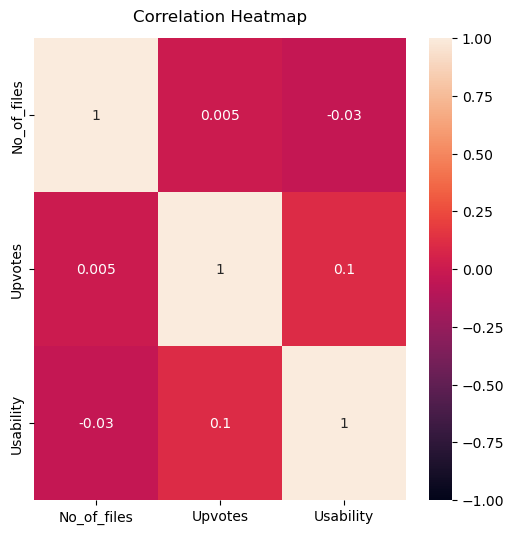

In [13]:
# SNS Correlation heatmap with title
fig, ax = plt.subplots(figsize=(6,6)) 
ax = sns.heatmap(df_data.corr(), vmin=-1, vmax=1, fmt='.1g', annot=True)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Observation
# This plot shows that pretty much all the correlations are red (negative)
# Out of all these the highest is 0.07 which is between usability and upvotes.

<AxesSubplot:>

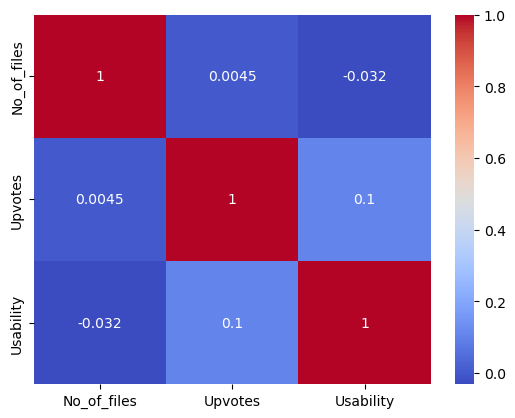

In [14]:
# Drawing a secong correlation heatmap without using pyplot
cm = df_data.corr()
sns.heatmap(cm, cmap = 'coolwarm', annot=True)

# Observation:
# Numbers are not rounded up here.

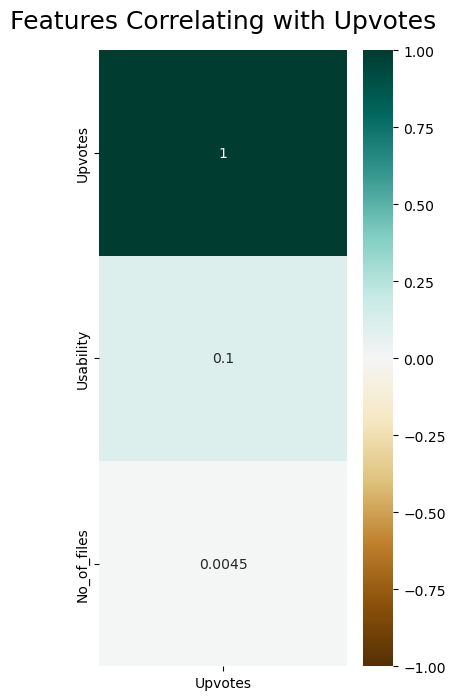

In [15]:
# Only show the correlations to the selected column in descending order.
# selected the upvotes feature for this example:

correlate_by = 'Upvotes'
plt.figure(figsize=(4, 8))
correlate_by_heatmap = sns.heatmap(df_data.corr()[[correlate_by]].sort_values(by=correlate_by, 
                                                                              ascending=False), 
                                   vmin=-1, 
                                   vmax=1, 
                                   annot=True, 
                                   cmap='BrBG')
correlate_by_heatmap.set_title(f'Features Correlating with {correlate_by}', 
                  fontdict={'fontsize':18}, pad=16);

# Observation
# This just confirms usability/upvote correlation in the heat map cell
# except that the correlation percentate here is 0.066 while in the heat map this is rounded to 7.
# This means if the data at hand and the subject as well as task require more accuracy one should 
# use selected features correlation in isolation to get more exact correlation data.

## Questions (10 points)

At minimum, develop three questions that you think will be worthwhile to explore in your data. For example:
- Which is the category that has the highest value?
- Which group has the highest mean?
These questions can be answer using various functions or the plots in the next section.

## <font color="green"> Answer </font>
##### Three questions that I think are worth exploring:

1. Are there categorical data in the dataset that can be used to graphically visualize relationships with
   the rest of other features in the dataset?
   
   Reason: graphical representation can be more effective in explaining or providing overall insight into information
   than just reading at calculated numbers, statistics, and text.
   

2. What is the distribution of values in each column?
   
   Reason: 
   This can provide an insight if the values in a column are diverse and spread enough or they tilt to one side - just
   one more way to evaluate if a particular data we may be looking is leaning towards or away from some target we 
   want.
   

3. What are the most common or highest values in each column?

   Reason: 
   Finding the highest value in each column allows us to see which row/information is and then we can explore further 
   why it is so. Particulary this dataset being about the more usefull and popular datasets in Kaggle, and us being 
   data science students, it can be useful to know which and what kind of datasets to go look for researching 
   or experimenting with by finding out the highest value in a feature. (kind of a filtering mechanism)

In [16]:
# 1. Are there there categorical data in the dataset that can be used to graphically visualize relationships with
#    the rest of other features in the dataset?

# checking value count of the Medals column.
df_data['Medals'].value_counts()

# Turns out Medals useful in showing which datasets fall under
# which medal category, making it easier for picking the right datasets based on these categories.


Bronze      3700
No Medal    3486
Silver      1217
Gold         553
Name: Medals, dtype: int64

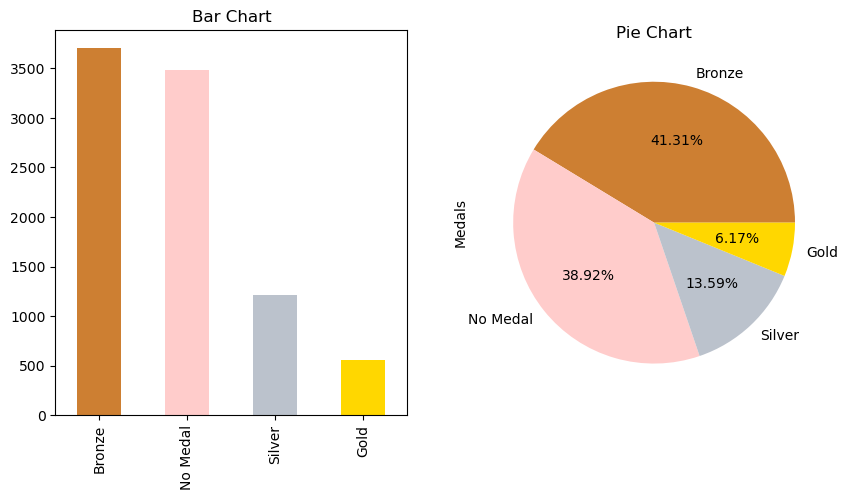

In [17]:
# Showing pie and bar charts side by side for the categorical column medals

counts = df_data['Medals'].value_counts()

fit, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

# setting the colors of the bars for each category
# define colors for each category
clrs = ['#CD7F32',  # bronze
          '#FFCCCB',  # gray for no medal
          '#BBC2CC',  # silver
          '#FFD700']  # gold         


# plot bar chart on the first subplot
counts.plot(kind = 'bar', ax = ax1, color = clrs)
ax1.set_title('Bar Chart')

# plot pie chart on the second subplot
counts.plot(kind = 'pie', ax = ax2, colors = clrs, autopct='%.2f%%')
ax2.set_title('Pie Chart')

plt.show()

# The pie chart shows graphicall cuts for each medal, but also provides percentages for each.

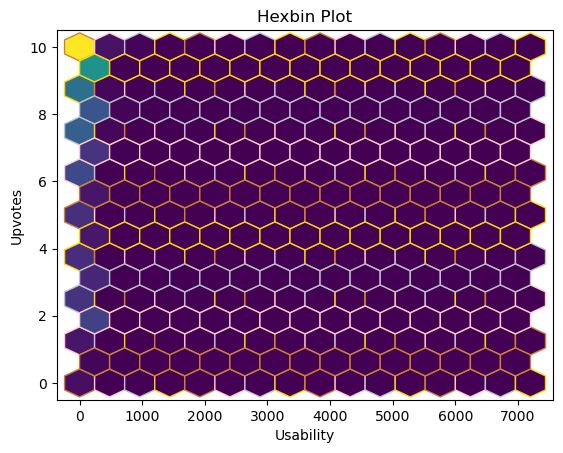

In [18]:
# Hexbin plot representaion for the usability data, just to show another graphical representation of data.
fig, ax = plt.subplots()
ax.hexbin(df_data['Upvotes'], df_data['Usability'], gridsize = 15, color = clrs)

# set title and labels
ax.set_title('Hexbin Plot')
ax.set_xlabel('Usability')
ax.set_ylabel('Upvotes')
plt.show()

# Observation
# I find this hexagonal representation of values is on a x,y plane graph interesting in that it could be useful
# in cases where you don't want very precise x,y point where changes happen but kind of around where they happen.

In [19]:
# 2. What is the distribution of values proportion in each column?

# For this I am going to simply do value_counts divided by count sum and get the ditribution,
# and wrap this with a for loop to get & display ditribution of values for each column

for i in df_data.columns:
    counts = df_data[i].value_counts()
    distribution = counts / counts.sum() * 100 
    print('\033[1mDistribution of ' + i + ' as proportion\033[0m')
    print(distribution, '\n\n')
    
# Observation
# Since the value_counts already sorts the result in descending order, we can see what is/are the top
# value(s) for each column. For example down here we can see that:
# 1. datasets that have only CSV files are about 63% out of all the files in the dataset. 
# 2. Only ~25% of datasets have received a score of 10 in usability
# 3. Five percent of all the datasets was contributed by the 'thedevastator' author


Distribution of Dataset_name as proportion
Hotel Reservations Dataset                     0.0112
Smart Cities Index Datasets                    0.0112
23dec_inceptionv4_upsample5e4true6             0.0112
22dec_tfefficientnetv2s_upsample105e4true6     0.0112
DRIVE 2004                                     0.0112
                                                ...  
model-per-class-eval                           0.0112
National Ecological Footprint and GDP Growth   0.0112
ReExport Forecast                              0.0112
International airline passengers               0.0112
Israeli Premier League - Team stats 2016-20    0.0112
Name: Dataset_name, Length: 8955, dtype: float64 


Distribution of Author_name as proportion
The Devastator      5.5940
Arunodhayan         0.6476
Larxel              0.5583
Devrim Tuncer       0.5248
kabhishm            0.4801
                     ...  
huzefakhan          0.0112
Davin Wijaya        0.0112
Ritu Pande          0.0112
Vlasova Anastasia   0.0112

In [20]:
# 3. what are the highest values in each column? 

# Saving column names as list, because it is easier to traverse a list in a for loop instead of pandas series
col = df_data.columns.to_list()

for c in col:
    print('\nHighest value in', c, 'is:', '\033[1m' + str(df_data[c].value_counts().idxmax()) + '\033[0m' + ',',  
          'count:', df_data[c].value_counts().max())
    
# Observation: 
# This output shows neatly what is the highest value or category in each column, and its total count.
# However, the dataset_link entire column has unique values for each cell, so it could not have one value
# as the highest value because they are unique. Yet, the result here picked one dataset link and shows as the
# highest value.



Highest value in Dataset_name is: Hotel Reservations Dataset, count: 1

Highest value in Author_name is: The Devastator, count: 501

Highest value in Author_id is: https://www.kaggle.com/thedevastator, count: 501

Highest value in No_of_files is: 1, count: 4388

Highest value in size is: 2 MB, count: 324

Highest value in Type_of_file is: CSV, count: 5619

Highest value in Upvotes is: 1, count: 731

Highest value in Medals is: Bronze, count: 3700

Highest value in Usability is: 10.0, count: 2235

Highest value in Date is: 2023-02-02 00:00:00, count: 92

Highest value in Day is: Tue, count: 1401

Highest value in Time is: 2023-05-15 00:32:38, count: 3

Highest value in Dataset_link is: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset, count: 1


## Plotting (10 points)

Plotting is helpful to visualize relationship between the data. You will have the freedom to use whichever plot you think is best for your data. At minimum develop three plots as follow.
- Develop one plot for two features with positive correlation.
- Develop one plot for two features with negative correlation.
- Develop one plot with one feature being categorical and the other feature being numerical.
Comment and document any observations on your plots. 

Text(0, 0.5, 'Usability')

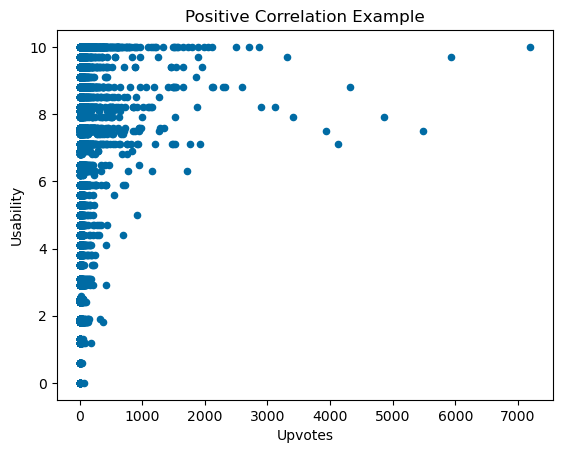

In [21]:
# Develop one plot for two features with positive correlation.
# plot a scatter plot
ax = df_data.plot(kind='scatter', x='Upvotes', y='Usability')

# set the title and labels
ax.set_title('Positive Correlation Example')
ax.set_xlabel('Upvotes')
ax.set_ylabel('Usability')

# Observation
# The cluster of usability score of six and above remain mostly within about three thousand
# upvotes, but there are few who stray above 3000 upvotes.

Text(0, 0.5, 'No_of_files')

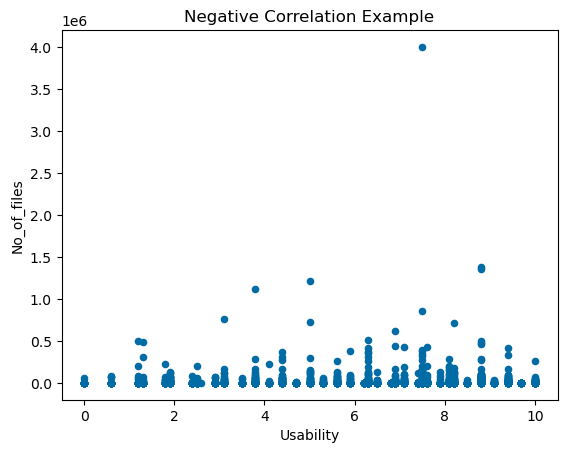

In [22]:
# Develop one plot for two features with negative correlation.
# plot a scatter plot
ax = df_data.plot(kind='scatter', x='Usability', y='No_of_files')

# set the title and labels
ax.set_title('Negative Correlation Example')
ax.set_xlabel('Usability')
ax.set_ylabel('No_of_files')

# Observation
# Most number of files stay under one file while usability score spreads througout the x axis values (0 - 10)

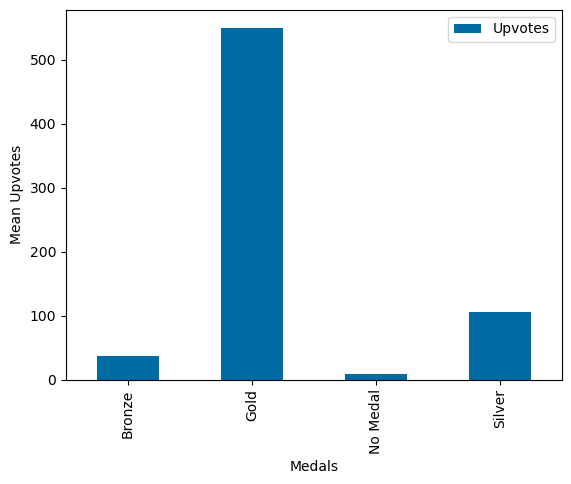

In [23]:
# Plot for one feature being categorical and one being numerical:

# group the data by category and calculate the mean value
grouped = df_data.groupby('Medals').agg({'Upvotes': 'mean'})
 
# plot a bar plot
grouped.plot(kind='bar')
plt.xlabel('Medals')
plt.ylabel('Mean Upvotes')
plt.show()

# NOTEBOOK END